In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [7]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


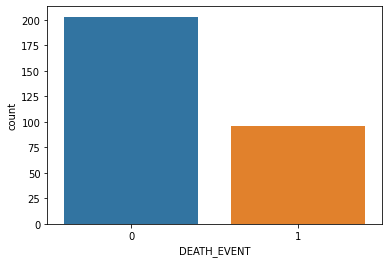

In [8]:
sns.countplot(x = df['DEATH_EVENT'])

Text(0.5, 1.0, 'distribution of age')

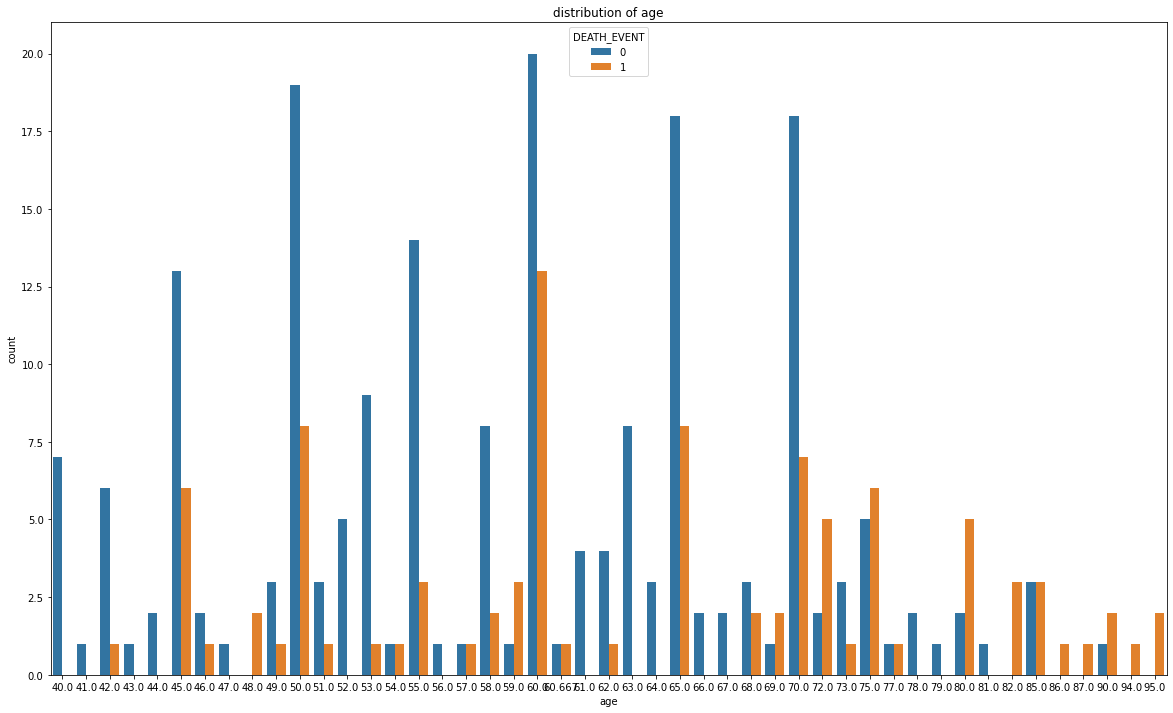

In [9]:
plt.figure(figsize=(20,12))
daysofweek = sns.countplot(x=df['age'],data = df,hue='DEATH_EVENT')
daysofweek.set_title('distribution of age')

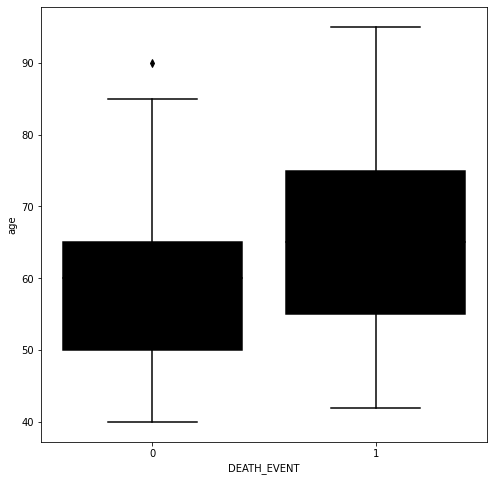

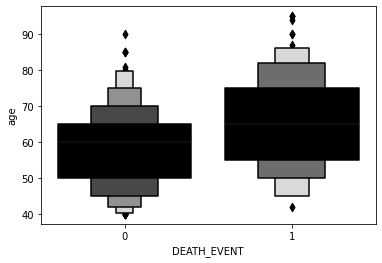

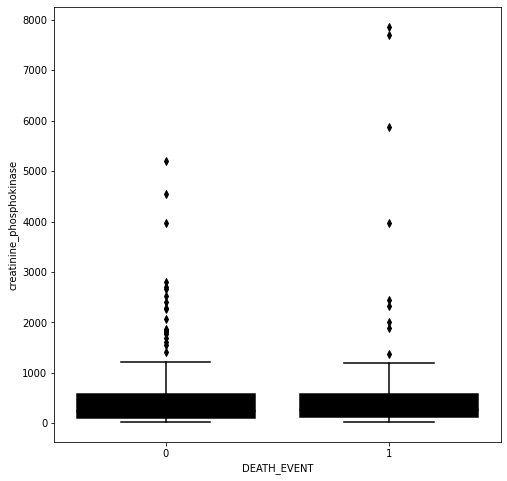

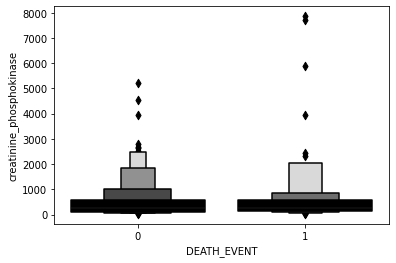

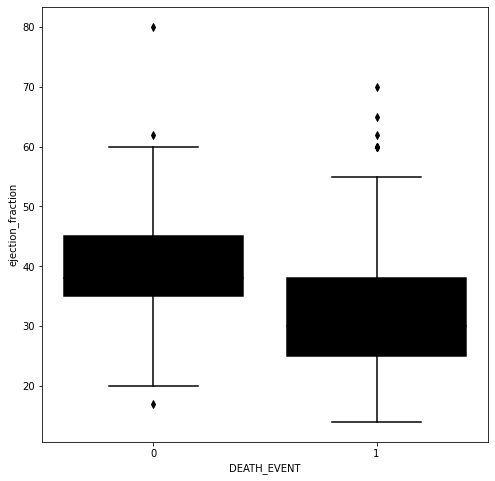

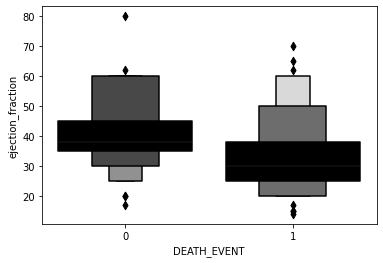

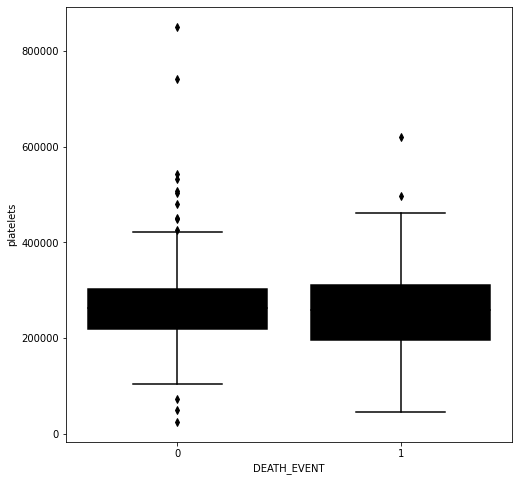

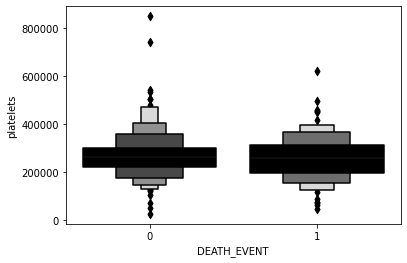

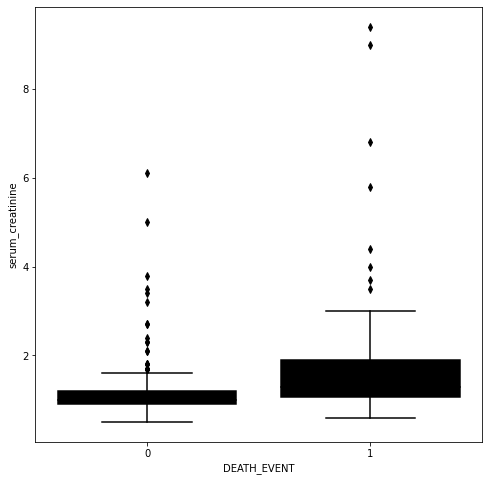

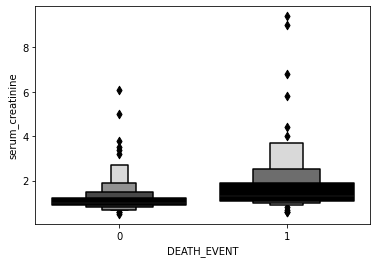

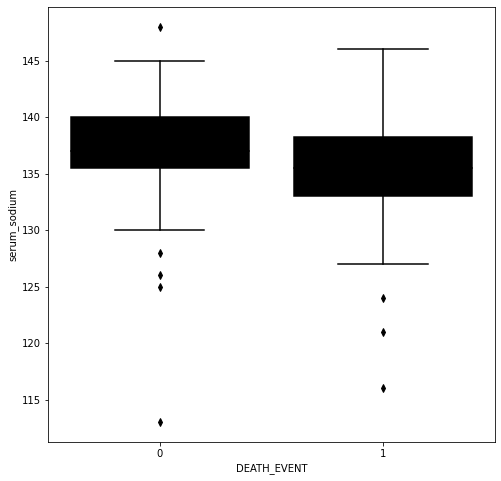

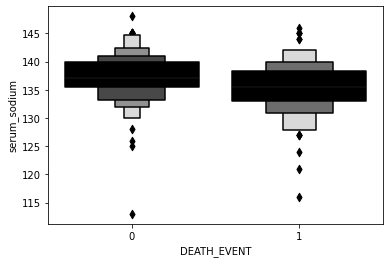

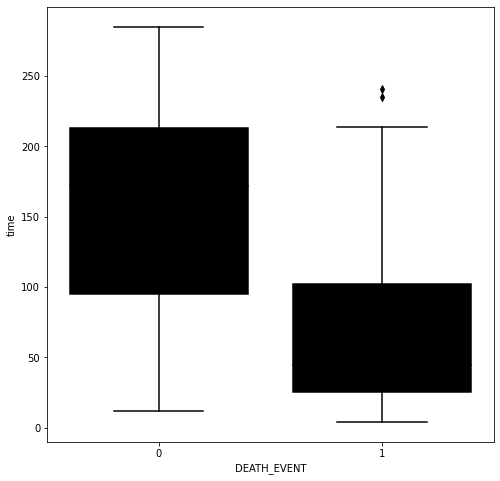

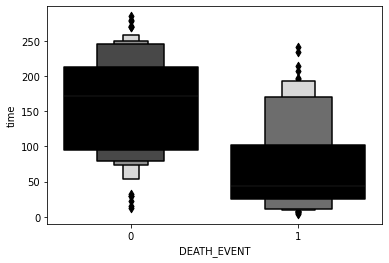

In [10]:
feature = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

for i in feature:
  plt.figure(figsize=(8,8))
  sns.boxplot(x=df['DEATH_EVENT'], y = df[i],color='black')
  plt.show()
  sns.boxenplot(x=df['DEATH_EVENT'], y = df[i],color='black')
  plt.show()

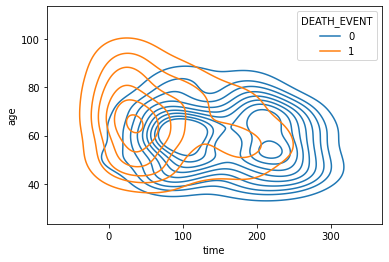

In [11]:
sns.kdeplot(x=df['time'], y = df['age'],hue=df['DEATH_EVENT'])

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
x = df.drop(['DEATH_EVENT'],axis = 1)
y = df['DEATH_EVENT']

In [14]:
col_names = list(x.columns)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaledx = scaler.fit_transform(x)


In [18]:
xdf = pd.DataFrame(scaledx,columns = col_names)
xdf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,1.009969e-16,0.000000,9.060014e-17,-3.267546e-17,0.000000,7.723291e-17,1.425838e-16,-8.673849e-16,-8.911489e-18,-1.188199e-17,-1.901118e-16
std,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-8.711048e-01,-0.576918,-8.475794e-01,-2.038387e+00,-0.735688,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.359272e+00,-6.876819e-01,-1.629502e+00
25%,-8.281242e-01,-8.711048e-01,-0.480393,-8.475794e-01,-6.841802e-01,-0.735688,-5.208700e-01,-4.782047e-01,-5.959961e-01,-1.359272e+00,-6.876819e-01,-7.389995e-01
50%,-7.022315e-02,-8.711048e-01,-0.342574,-8.475794e-01,-7.076750e-03,-0.735688,-1.390846e-02,-2.845524e-01,8.503384e-02,7.356882e-01,-6.876819e-01,-1.969543e-01
75%,7.718891e-01,1.147968e+00,0.000166,1.179830e+00,5.853888e-01,1.359272,4.111199e-01,5.926150e-03,7.660638e-01,7.356882e-01,1.454161e+00,9.387595e-01
max,2.877170e+00,1.147968e+00,7.514640,1.179830e+00,3.547716e+00,1.359272,6.008180e+00,7.752020e+00,2.582144e+00,7.356882e-01,1.454161e+00,1.997038e+00


<function matplotlib.pyplot.show(*args, **kw)>

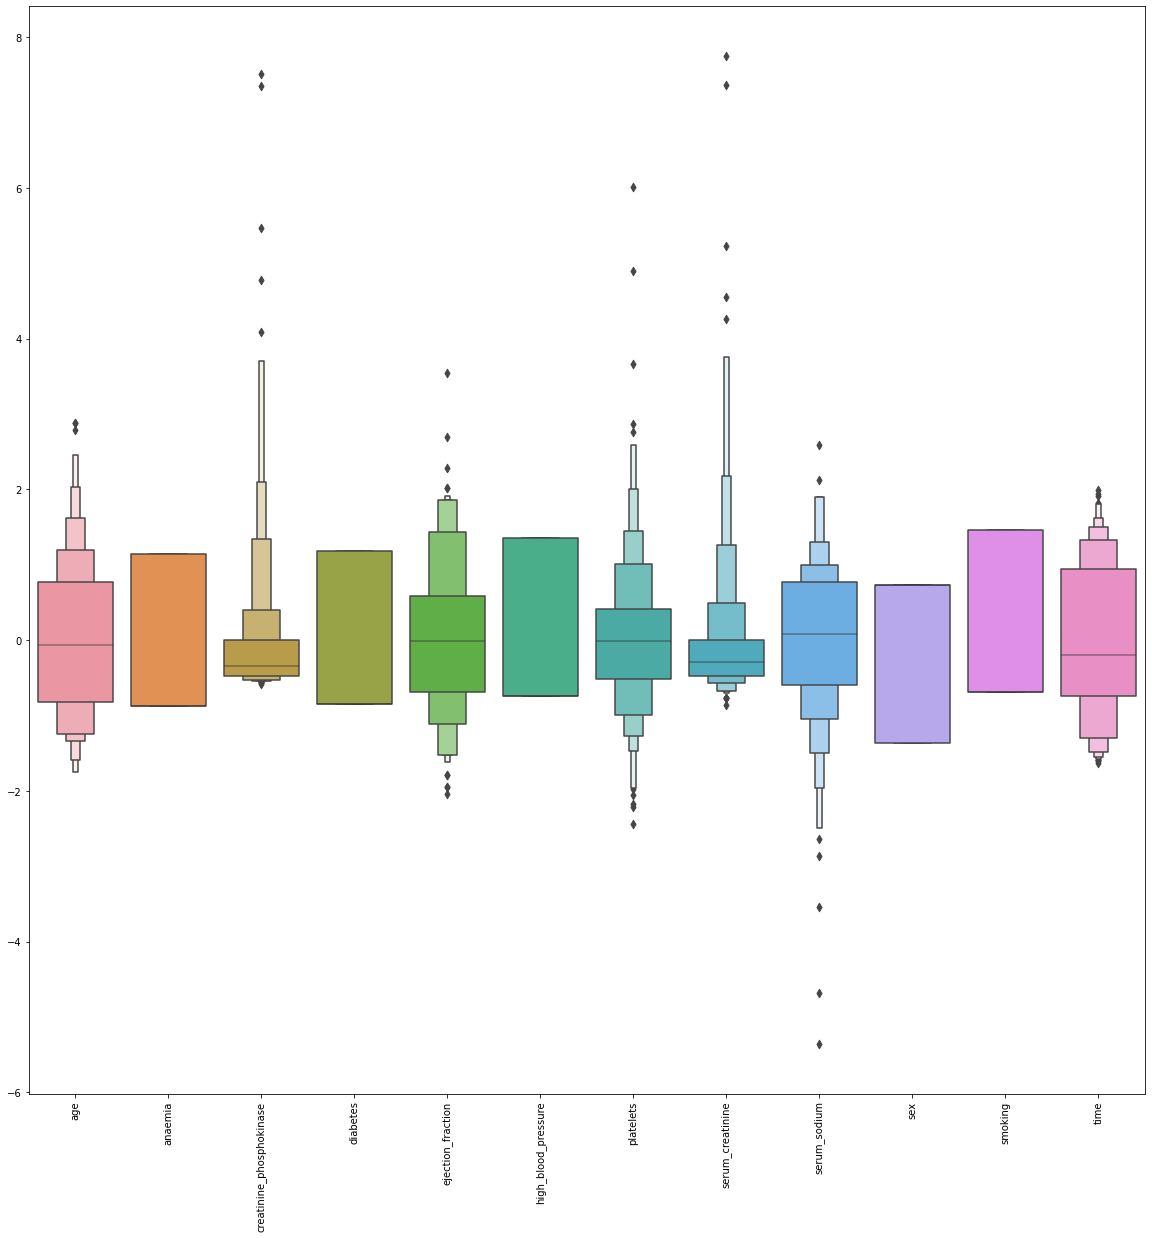

In [19]:
plt.figure(figsize=(20,20))
sns.boxenplot(data = xdf)
plt.xticks(rotation=90)
plt.show

In [20]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(xdf, y, test_size=0.33, random_state=101)

In [40]:
from keras import callbacks
from keras.layers import Dense ,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
#from keras.utils import to_categorical


In [56]:
earlystopping = callbacks.EarlyStopping(min_delta=0.0001,
                                        
                                        patience = 20,
                                        restore_best_weights=True)

In [57]:
model = Sequential()

In [58]:
#layers
model.add(Dense(units = 32,kernel_initializer='uniform',activation = 'relu',input_dim = 12))
model.add(Dense(units = 64,kernel_initializer='uniform',activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,kernel_initializer='uniform',activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 32,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1,kernel_initializer = 'uniform',activation = 'sigmoid'))

#compiling the ann



model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [59]:
# train the ann

history = model.fit(X_train,y_train,batch_size=32,epochs = 500,callbacks = [earlystopping],validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 1s 43ms/step - loss: 0.6926 - accuracy: 0.6625 - val_loss: 0.6924 - val_accuracy: 0.6000
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6909 - accuracy: 0.6938 - val_loss: 0.6915 - val_accuracy: 0.6000
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.6938 - val_loss: 0.6904 - val_accuracy: 0.6000
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6870 - accuracy: 0.6938 - val_loss: 0.6886 - val_accuracy: 0.6000
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6829 - accuracy: 0.6938 - val_loss: 0.6857 - val_accuracy: 0.6000
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6753 - accuracy: 0.6938 - val_loss: 0.6800 - val_accuracy: 0.6000
Epoch 7/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6602 - accuracy: 0.6938 - val_loss: 0.6689 - val_accuracy: 0.6000
Epoch 8/500
5/5 [=======

In [60]:
val_accuracy = np.mean(history.history['val_accuracy'])
val_accuracy

0.7104651276455369

In [62]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

In [63]:
y_pred

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [